In [11]:
from matplotlib import pyplot as plt
import numpy as np
import mogreps
import netCDF4
import pandas as pd

In [12]:
import os
os.getcwd()

'/home/paula/Desktop/Metoffice/miniproject'

In [90]:
# read in netCDF
data_set = netCDF4.Dataset('ensemble_means_201401_lat250_lon100.nc')
data_set2 = netCDF4.Dataset('ensemble_means_201402_lat250_lon100.nc')
test_data_set=netCDF4.Dataset('test_data_201401_lat250_lon100.nc')
test_data_set2=netCDF4.Dataset('test_data_201402_lat250_lon100.nc')

In [94]:
np.array(data_set2.variables['Temperature'])

array([238.53125, 241.48438, 250.28125, 239.25   , 245.84375, 243.15625,
       241.42188, 242.07812, 243.73438, 239.90625, 242.6875 , 242.0625 ,
       236.57812, 249.21875, 246.39062, 240.14062, 247.375  , 245.04688,
       248.76562, 252.29688, 240.03125, 247.54688, 251.57812, 242.9375 ,
       241.04688, 240.70312, 246.28125, 241.07812], dtype=float32)

In [106]:
#data_set.variables.keys()

temperature1 = data_set.variables['Temperature']
pressure1 = data_set.variables['Pressure']
humidity1 = data_set.variables['Humidity']
windspeed1 = data_set.variables['Wind Speed']

temperature2 = data_set2.variables['Temperature']
pressure2 = data_set2.variables['Pressure']
humidity2 = data_set2.variables['Humidity']
windspeed2 = data_set2.variables['Wind Speed']

temperature_test1 = test_data_set.variables['Temperature']
humidity_test1 = test_data_set.variables['Humidity']
pressure_test1 = test_data_set.variables['Pressure']
wind_test1 = test_data_set.variables['Wind Speed']

temperature_test2 = test_data_set2.variables['Temperature']
humidity_test2 = test_data_set2.variables['Humidity']
pressure_test2 = test_data_set2.variables['Pressure']
wind_test2 = test_data_set2.variables['Wind Speed']

temperature=np.concatenate((temperature1,temperature2))
humidity=np.concatenate((humidity1,humidity2))
pressure=np.concatenate((pressure1,pressure2))
windspeed=np.concatenate((windspeed1,windspeed2))

temperature_test=np.concatenate((temperature_test1,temperature_test2))
humidity_test=np.concatenate((humidity_test1,humidity_test2))
pressure_test=np.concatenate((pressure_test1,pressure_test2))
wind_test=np.concatenate((wind_test1,wind_test2))

humidity_train = np.array(humidity)
humidity_test = np.array(humidity_test).mean(axis=1)
pressure_train =  np.array(pressure)
pressure_test = np.array(pressure_test).mean(axis=1)
wind_train =  np.array(windspeed)
wind_test = np.array(wind_test).mean(axis=1)

temperature_train = np.array(temperature)
temperature_test = np.array(temperature_test).mean(axis=1)

# number=40

# humidity_train = np.array(humidity[:number])
# humidity_test = np.array(humidity[number:])
# pressure_train =  np.array(pressure[:number])
# pressure_test = np.array(pressure[number:])
# wind_train =  np.array(windspeed[:number])
# wind_test = np.array(windspeed[number:])

# temperature_train = temperature[:number]
# temperature_test = temperature[number:]


In [64]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# # Load the dataset.
# traindata=pd.read_table('traindata.txt',usecols=[1,2,3,4,5,6,7,8])
# testdata=pd.read_table('testdata.txt',usecols=[1,2,3,4,5,6,7,8])

In [16]:
#traindata.describe()

In [65]:
# traindata.hist(figsize=(18,6))
# plt.show()

In [38]:
# # Split the data into training/testing sets.
# humidity_train = np.array(traindata['Xdes'])
# humidity_test = np.array(testdata['Xdes'])
# pressure_train =  np.array(traindata['Ydes'])
# pressure_test = np.array(testdata['Ydes'])
# wind_train =  np.array(traindata['Sdes'])
# wind_test = np.array(testdata['Sdes'])


In [108]:
df = pd.DataFrame(np.stack((humidity_train,pressure_train,wind_train, temperature_train),axis=1))

(array([ 2.,  8., 10., 14.,  9.,  3.,  5.,  3.,  4.,  1.]),
 array([236.578125 , 238.5828125, 240.5875   , 242.5921875, 244.596875 ,
        246.6015625, 248.60625  , 250.6109375, 252.615625 , 254.6203125,
        256.625    ]),
 <a list of 10 Patch objects>)

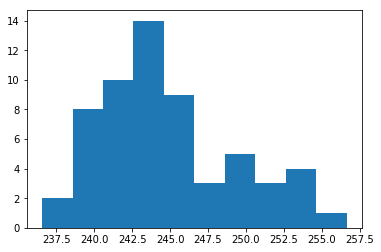

In [109]:
plt.hist(temperature_train)

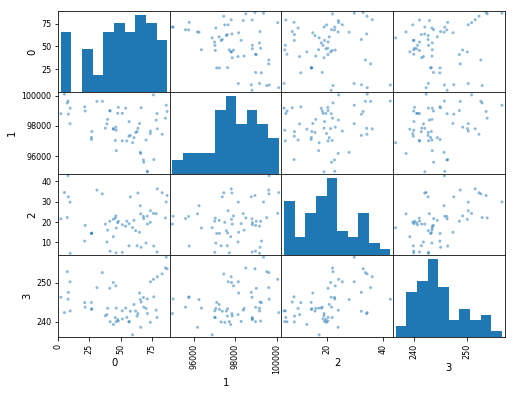

In [110]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(8,6))
plt.show()

In [111]:
# # Split the targets into training/testing sets.
# temperature_train = np.array(traindata['Y'])
# temperature_test = np.array(testdata['Y'])


predictors_train=np.stack((humidity_train,pressure_train,wind_train),axis=1)
predictors_test=np.stack((humidity_test,pressure_test,wind_test),axis=1)

# Create linear regression object
regr = linear_model.LinearRegression()



# Train the model using the training sets
regr.fit(predictors_train,temperature_train)

# Make predictions using the testing set
temperature_pred = regr.predict(predictors_test)

# The coefficients.
print('Coefficients: \n', regr.coef_)
# The mean squared error.
print("Mean squared error: %.2f"
      % mean_squared_error(temperature_test, temperature_pred))
# Explained variance score: 1 is perfect prediction.
print('Variance score: %.2f' % r2_score(temperature_test, temperature_pred))



Coefficients: 
 [0.04331933 0.00103093 0.22308189]
Mean squared error: 13.11
Variance score: 0.34


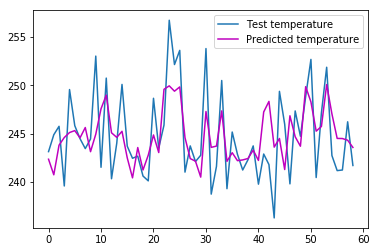

In [112]:
plt.plot(temperature_test,label='Test temperature')
plt.plot(temperature_pred,'m',label='Predicted temperature')
plt.legend()

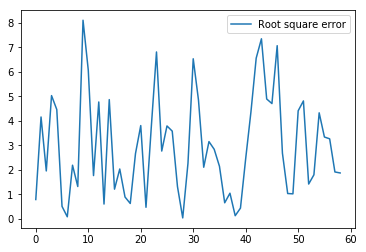

In [113]:
plt.plot(np.sqrt((temperature_test-temperature_pred)**2),label='Root square error')
plt.legend()

Text(0,0.5,'Predicted temperature')

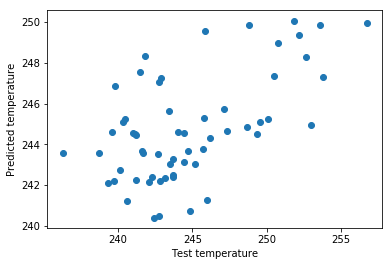

In [114]:
plt.scatter(temperature_test,temperature_pred)
plt.xlabel('Test temperature')
plt.ylabel('Predicted temperature')
#plt.legend()